# Data Preparation

## Load libraries

In [1]:
# main libraries
import numpy as np
import pandas as pd

# data visualization
from plotnine import (
    ggplot,
    aes,
    geom_bar,
    geom_boxplot,
    geom_line,
    geom_point,
    geom_violin,
    xlab,
    ylab,
    ggtitle,
    facet_grid,
    coord_flip,
    theme,
    scale_x_discrete,
    scale_x_continuous,
)

# data preparation and model creation
from sklearn import preprocessing as pp
from sklearn.preprocessing import OrdinalEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

## Explore the data

In [2]:
sales_df = pd.read_csv('SalesForCourse_quizz_table.csv')
sales_df.shape

(34867, 16)

In [3]:
sales_df.head()

,index,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue,Column1
0,0,02/19/16,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,1.0,80.00,109.000000,80.0,109.0,NaN
1,1,02/20/16,2016.0,February,29.0,F,United States,Washington,Clothing,Gloves,2.0,24.50,28.500000,49.0,57.0,NaN
2,2,02/27/16,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,3.67,5.000000,11.0,15.0,NaN
3,3,03/12/16,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,2.0,87.50,116.500000,175.0,233.0,NaN
4,4,03/12/16,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,35.00,41.666667,105.0,125.0,NaN


In [4]:
sales_df.drop(['index','Column1'], axis='columns', inplace=True)
sales_df.head()

,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue
0,02/19/16,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,1.0,80.00,109.000000,80.0,109.0
1,02/20/16,2016.0,February,29.0,F,United States,Washington,Clothing,Gloves,2.0,24.50,28.500000,49.0,57.0
2,02/27/16,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,3.67,5.000000,11.0,15.0
3,03/12/16,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,2.0,87.50,116.500000,175.0,233.0
4,03/12/16,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,35.00,41.666667,105.0,125.0


In [5]:
sales_df.shape

(34867, 14)

In [6]:
sales_df.describe()

,Year,Customer Age,Quantity,Unit Cost,Unit Price,Cost,Revenue
count,34866.000000,34866.000000,34866.000000,34866.000000,34866.000000,34866.000000,34867.000000
mean,2015.569237,36.382895,2.002524,349.880567,389.232485,576.004532,640.870093
std,0.495190,11.112902,0.813936,490.015846,525.319091,690.500395,736.640033
min,2015.000000,17.000000,1.000000,0.670000,0.666667,2.000000,2.000000
25%,2015.000000,28.000000,1.000000,45.000000,53.666667,85.000000,102.000000
50%,2016.000000,35.000000,2.000000,150.000000,179.000000,261.000000,319.000000
75%,2016.000000,44.000000,3.000000,455.000000,521.000000,769.000000,902.000000
max,2016.000000,87.000000,3.000000,3240.000000,5082.000000,3600.000000,5082.000000


In [7]:
# drop the last row
sales_df = sales_df.iloc[:-1]
sales_df.describe()

,Year,Customer Age,Quantity,Unit Cost,Unit Price,Cost,Revenue
count,34866.000000,34866.000000,34866.000000,34866.000000,34866.000000,34866.000000,34866.000000
mean,2015.569237,36.382895,2.002524,349.880567,389.232485,576.004532,640.870074
std,0.495190,11.112902,0.813936,490.015846,525.319091,690.500395,736.650597
min,2015.000000,17.000000,1.000000,0.670000,0.666667,2.000000,2.000000
25%,2015.000000,28.000000,1.000000,45.000000,53.666667,85.000000,102.000000
50%,2016.000000,35.000000,2.000000,150.000000,179.000000,261.000000,319.000000
75%,2016.000000,44.000000,3.000000,455.000000,521.000000,769.000000,902.000000
max,2016.000000,87.000000,3.000000,3240.000000,5082.000000,3600.000000,5082.000000


In [8]:
sales_df.dtypes

Date                 object
Year                float64
Month                object
Customer Age        float64
Customer Gender      object
Country              object
State                object
Product Category     object
Sub Category         object
Quantity            float64
Unit Cost           float64
Unit Price          float64
Cost                float64
Revenue             float64
dtype: object

## Engineer new features

In [9]:
# standardize date format
sales_df['Date'] = pd.to_datetime(sales_df['Date'])
sales_df.head()

,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue
0,2016-02-19,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,1.0,80.00,109.000000,80.0,109.0
1,2016-02-20,2016.0,February,29.0,F,United States,Washington,Clothing,Gloves,2.0,24.50,28.500000,49.0,57.0
2,2016-02-27,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,3.67,5.000000,11.0,15.0
3,2016-03-12,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,2.0,87.50,116.500000,175.0,233.0
4,2016-03-12,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,35.00,41.666667,105.0,125.0


In [10]:
sales_df.dtypes

Date                datetime64[ns]
Year                       float64
Month                       object
Customer Age               float64
Customer Gender             object
Country                     object
State                       object
Product Category            object
Sub Category                object
Quantity                   float64
Unit Cost                  float64
Unit Price                 float64
Cost                       float64
Revenue                    float64
dtype: object

In [11]:
# extract day from date
sales_df['day_of_week'] = sales_df['Date'].dt.dayofweek
sales_df['day_of_week'] = sales_df['day_of_week'].map({
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
})
sales_df.head()

,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue,day_of_week
0,2016-02-19,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,1.0,80.00,109.000000,80.0,109.0,Friday
1,2016-02-20,2016.0,February,29.0,F,United States,Washington,Clothing,Gloves,2.0,24.50,28.500000,49.0,57.0,Saturday
2,2016-02-27,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,3.67,5.000000,11.0,15.0,Saturday
3,2016-03-12,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,2.0,87.50,116.500000,175.0,233.0,Saturday
4,2016-03-12,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,35.00,41.666667,105.0,125.0,Saturday


In [12]:
# create age bracket
age_groups = ['0-18', '19-25', '26-35', '36-50', '51-65', '65+']
sales_df['age_bracket'] = pd.cut(sales_df['Customer Age'],
                                 bins=[0, 18, 25, 35, 50, 65, 100],
                                 labels=age_groups)
sales_df.head()

,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue,day_of_week,age_bracket
0,2016-02-19,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,1.0,80.00,109.000000,80.0,109.0,Friday,26-35
1,2016-02-20,2016.0,February,29.0,F,United States,Washington,Clothing,Gloves,2.0,24.50,28.500000,49.0,57.0,Saturday,26-35
2,2016-02-27,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,3.67,5.000000,11.0,15.0,Saturday,26-35
3,2016-03-12,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,2.0,87.50,116.500000,175.0,233.0,Saturday,26-35
4,2016-03-12,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,35.00,41.666667,105.0,125.0,Saturday,26-35


In [13]:
# rearrange the columns for readability
cols = list(sales_df.columns.values)
cols

['Date',
 'Year',
 'Month',
 'Customer Age',
 'Customer Gender',
 'Country',
 'State',
 'Product Category',
 'Sub Category',
 'Quantity',
 'Unit Cost',
 'Unit Price',
 'Cost',
 'Revenue',
 'day_of_week',
 'age_bracket']

In [14]:
cols.remove('day_of_week')
cols.insert(3, 'day_of_week')

cols.remove('age_bracket')
cols.insert(5, 'age_bracket')
cols

['Date',
 'Year',
 'Month',
 'day_of_week',
 'Customer Age',
 'age_bracket',
 'Customer Gender',
 'Country',
 'State',
 'Product Category',
 'Sub Category',
 'Quantity',
 'Unit Cost',
 'Unit Price',
 'Cost',
 'Revenue']

In [15]:
sales_df = sales_df[cols]
sales_df.head()

,Date,Year,Month,day_of_week,Customer Age,age_bracket,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue
0,2016-02-19,2016.0,February,Friday,29.0,26-35,F,United States,Washington,Accessories,Tires and Tubes,1.0,80.00,109.000000,80.0,109.0
1,2016-02-20,2016.0,February,Saturday,29.0,26-35,F,United States,Washington,Clothing,Gloves,2.0,24.50,28.500000,49.0,57.0
2,2016-02-27,2016.0,February,Saturday,29.0,26-35,F,United States,Washington,Accessories,Tires and Tubes,3.0,3.67,5.000000,11.0,15.0
3,2016-03-12,2016.0,March,Saturday,29.0,26-35,F,United States,Washington,Accessories,Tires and Tubes,2.0,87.50,116.500000,175.0,233.0
4,2016-03-12,2016.0,March,Saturday,29.0,26-35,F,United States,Washington,Accessories,Tires and Tubes,3.0,35.00,41.666667,105.0,125.0


## Create categorical variables

In [16]:
sales_df['Year'].value_counts()

2016.0    19847
2015.0    15019
Name: Year, dtype: int64

In [17]:
sales_df['Month'].value_counts()

June         3680
May          3676
December     3414
April        3283
March        3155
January      2907
February     2887
October      2554
November     2488
August       2304
September    2303
July         2215
Name: Month, dtype: int64

In [18]:
sales_df['day_of_week'].value_counts()

Friday       5134
Sunday       5078
Tuesday      5061
Saturday     5038
Wednesday    4918
Thursday     4839
Monday       4798
Name: day_of_week, dtype: int64

In [19]:
sales_df['age_bracket'].value_counts()

36-50    12696
26-35    11826
19-25     5268
51-65     4050
0-18       808
65+        218
Name: age_bracket, dtype: int64

In [20]:
sales_df['Customer Gender'].value_counts()

M    17805
F    17061
Name: Customer Gender, dtype: int64

In [21]:
sales_df['Country'].value_counts()

United States     18076
United Kingdom     6421
Germany            5201
France             5168
Name: Country, dtype: int64

In [22]:
sales_df['State'].value_counts()

California             10332
England                 6421
Washington              5204
Oregon                  2446
Saarland                1287
Nordrhein-Westfalen     1171
Hessen                  1112
Seine (Paris)           1092
Hamburg                  869
Seine Saint Denis        796
Nord                     787
Bayern                   668
Hauts de Seine           509
Essonne                  465
Yveline                  442
Seine et Marne           183
Moselle                  181
Loiret                   178
Val d'Oise               130
Garonne (Haute)          100
Brandenburg               94
Val de Marne              75
Charente-Maritime         70
Somme                     61
Loir et Cher              57
Pas de Calais             42
Texas                     14
Illinois                  14
Ohio                      13
New York                  10
Florida                    7
Utah                       5
South Carolina             5
Kentucky                   4
Minnesota     

In [23]:
sales_df['Product Category'].value_counts()

Accessories    22534
Bikes           7093
Clothing        5239
Name: Product Category, dtype: int64

In [24]:
sales_df['Sub Category'].value_counts()

Tires and Tubes      11112
Bottles and Cages     5295
Helmets               4176
Road Bikes            3022
Mountain Bikes        2737
Jerseys               2000
Caps                  1517
Touring Bikes         1334
Fenders                762
Shorts                 566
Cleaners               545
Gloves                 480
Hydration Packs        396
Socks                  364
Vests                  312
Bike Stands            145
Bike Racks             103
Name: Sub Category, dtype: int64

In [25]:
categorical_cols = ['Year', 'Month', 'day_of_week', 'age_bracket', 'Customer Gender', 'Country', 'State', 'Product Category', 'Sub Category']

for column in categorical_cols:
    sales_df[column] = sales_df[column].astype("category")
    
sales_df.dtypes

Date                datetime64[ns]
Year                      category
Month                     category
day_of_week               category
Customer Age               float64
age_bracket               category
Customer Gender           category
Country                   category
State                     category
Product Category          category
Sub Category              category
Quantity                   float64
Unit Cost                  float64
Unit Price                 float64
Cost                       float64
Revenue                    float64
dtype: object

## Create visualizations

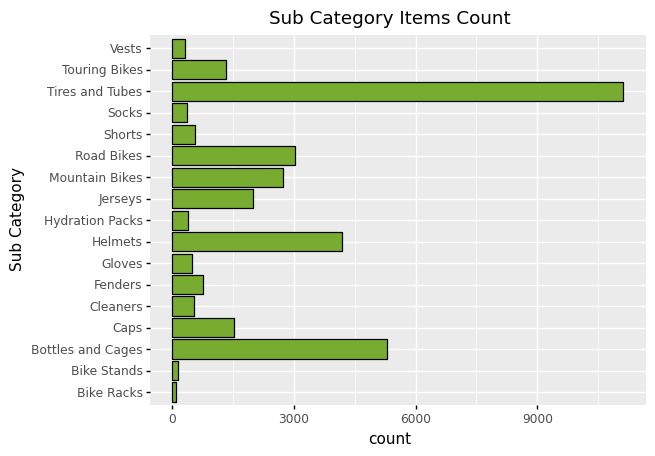

<ggplot: (-9223371914065751310)>

In [26]:
# sub category items count
(
    ggplot(sales_df, aes(x='Sub Category')) 
    
    + geom_bar(fill='#77AC30', colour='black') 
    
    + coord_flip()
    
    + ggtitle('Sub Category Items Count')
)

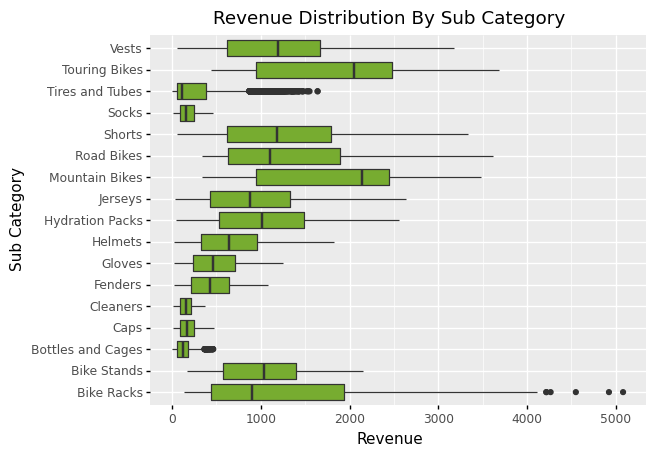

<ggplot: (122789233917)>

In [27]:
# visualize revenue distribution by sub category
(
    ggplot(sales_df, aes(x='Sub Category', y='Revenue')) 
    
    + geom_boxplot(fill='#77AC30') 
    
    + coord_flip()
    
    + ggtitle('Revenue Distribution By Sub Category')
)

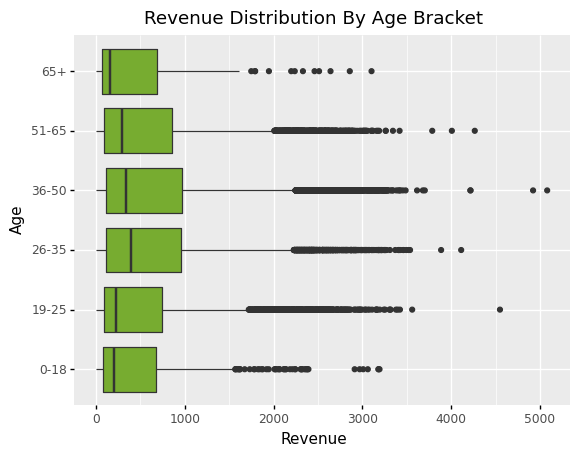

<ggplot: (122789320424)>

In [28]:
# revenue distribution by age bracket
(
    ggplot(sales_df, aes(x='age_bracket', y='Revenue')) 
    
    + geom_boxplot(fill='#77AC30') 
    
    + coord_flip()
    
    + xlab('Age')
    
    + ggtitle('Revenue Distribution By Age Bracket')
)

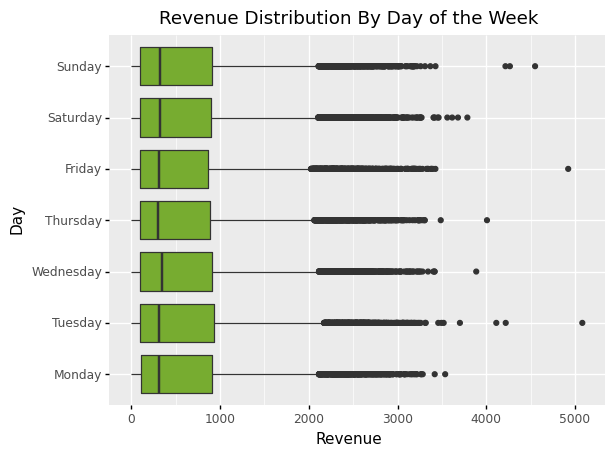

<ggplot: (122789445675)>

In [29]:
# revenue distribution by day of the week
(
    ggplot(sales_df, aes(x='day_of_week', y='Revenue')) 
    
    + geom_boxplot(fill='#77AC30')
    
    + coord_flip()
    
    + xlab('Day')
    
    + scale_x_discrete(limits=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
    
    + ggtitle('Revenue Distribution By Day of the Week')
)

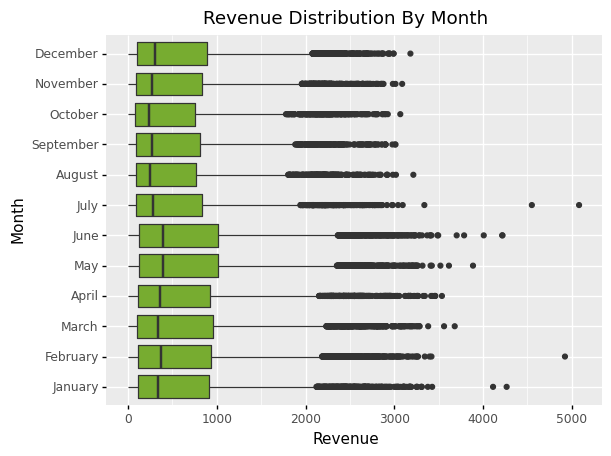

<ggplot: (-9223371914065451653)>

In [30]:
# revenue distribution by month
(
    ggplot(sales_df, aes(x='Month', y='Revenue')) 
    
    + geom_boxplot(fill='#77AC30') 
    
    + coord_flip()
    
    + scale_x_discrete(limits=['January', 'February', 'March', 'April', 'May', 'June',
                               'July', 'August', 'September', 'October', 'November', 'December'])
    
    + ggtitle('Revenue Distribution By Month')
)

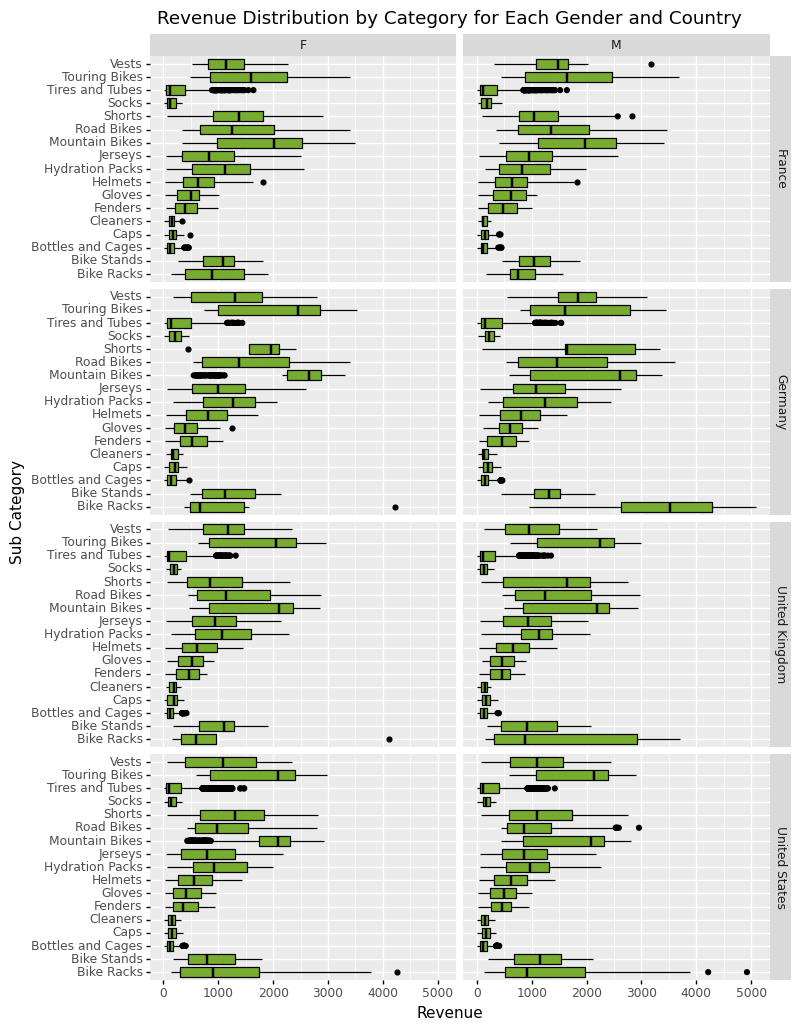

<ggplot: (122789426303)>

In [31]:
# Revenue Distribution by Category for Each Gender and Country
(
    ggplot(sales_df, aes(x='Sub Category', y='Revenue'))
    
    + geom_boxplot(fill='#77AC30', colour='black')
    
    + coord_flip()
    
    + facet_grid('Country ~ Customer Gender')
    
    + ggtitle('Revenue Distribution by Category for Each Gender and Country')
    
    + theme(figure_size=(8, 12))
)

## Encode categorical variables

In [32]:
sales_df.dtypes

Date                datetime64[ns]
Year                      category
Month                     category
day_of_week               category
Customer Age               float64
age_bracket               category
Customer Gender           category
Country                   category
State                     category
Product Category          category
Sub Category              category
Quantity                   float64
Unit Cost                  float64
Unit Price                 float64
Cost                       float64
Revenue                    float64
dtype: object

In [33]:
sales_df.head()

,Date,Year,Month,day_of_week,Customer Age,age_bracket,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue
0,2016-02-19,2016.0,February,Friday,29.0,26-35,F,United States,Washington,Accessories,Tires and Tubes,1.0,80.00,109.000000,80.0,109.0
1,2016-02-20,2016.0,February,Saturday,29.0,26-35,F,United States,Washington,Clothing,Gloves,2.0,24.50,28.500000,49.0,57.0
2,2016-02-27,2016.0,February,Saturday,29.0,26-35,F,United States,Washington,Accessories,Tires and Tubes,3.0,3.67,5.000000,11.0,15.0
3,2016-03-12,2016.0,March,Saturday,29.0,26-35,F,United States,Washington,Accessories,Tires and Tubes,2.0,87.50,116.500000,175.0,233.0
4,2016-03-12,2016.0,March,Saturday,29.0,26-35,F,United States,Washington,Accessories,Tires and Tubes,3.0,35.00,41.666667,105.0,125.0


In [34]:
oneHot_encoded_features = pd.get_dummies(sales_df[['Customer Gender', 
                                                  'Country',
                                                  'State',
                                                  'Product Category',
                                                  'Sub Category']])
oneHot_encoded_features.head()

,Customer Gender_F,Customer Gender_M,Country_France,Country_Germany,Country_United Kingdom,Country_United States,State_Alabama,State_Arizona,State_Bayern,State_Brandenburg,...,Sub Category_Helmets,Sub Category_Hydration Packs,Sub Category_Jerseys,Sub Category_Mountain Bikes,Sub Category_Road Bikes,Sub Category_Shorts,Sub Category_Socks,Sub Category_Tires and Tubes,Sub Category_Touring Bikes,Sub Category_Vests
0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [35]:
oneHot_encoded_features.columns.values

array(['Customer Gender_F', 'Customer Gender_M', 'Country_France',
       'Country_Germany', 'Country_United Kingdom',
       'Country_United States', 'State_Alabama', 'State_Arizona',
       'State_Bayern', 'State_Brandenburg', 'State_California',
       'State_Charente-Maritime', 'State_England', 'State_Essonne',
       'State_Florida', 'State_Garonne (Haute)', 'State_Georgia',
       'State_Hamburg', 'State_Hauts de Seine', 'State_Hessen',
       'State_Illinois', 'State_Kentucky', 'State_Loir et Cher',
       'State_Loiret', 'State_Massachusetts', 'State_Minnesota',
       'State_Mississippi', 'State_Missouri', 'State_Montana',
       'State_Moselle', 'State_New York', 'State_Nord',
       'State_Nordrhein-Westfalen', 'State_North Carolina', 'State_Ohio',
       'State_Oregon', 'State_Pas de Calais', 'State_Saarland',
       'State_Seine (Paris)', 'State_Seine Saint Denis',
       'State_Seine et Marne', 'State_Somme', 'State_South Carolina',
       'State_Texas', 'State_Utah', "St

In [36]:
oneHot_encoded_features.describe()

,Customer Gender_F,Customer Gender_M,Country_France,Country_Germany,Country_United Kingdom,Country_United States,State_Alabama,State_Arizona,State_Bayern,State_Brandenburg,...,Sub Category_Helmets,Sub Category_Hydration Packs,Sub Category_Jerseys,Sub Category_Mountain Bikes,Sub Category_Road Bikes,Sub Category_Shorts,Sub Category_Socks,Sub Category_Tires and Tubes,Sub Category_Touring Bikes,Sub Category_Vests
count,34866.000000,34866.000000,34866.000000,34866.000000,34866.000000,34866.000000,34866.000000,34866.000000,34866.000000,34866.000000,...,34866.000000,34866.000000,34866.000000,34866.000000,34866.000000,34866.000000,34866.000000,34866.000000,34866.000000,34866.000000
mean,0.489331,0.510669,0.148225,0.149171,0.184162,0.518442,0.000057,0.000057,0.019159,0.002696,...,0.119773,0.011358,0.057362,0.078501,0.086675,0.016234,0.010440,0.318706,0.038261,0.008949
std,0.499893,0.499893,0.355328,0.356262,0.387622,0.499667,0.007574,0.007574,0.137086,0.051854,...,0.324700,0.105967,0.232537,0.268961,0.281362,0.126374,0.101643,0.465981,0.191828,0.094174
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [37]:
ordinal_features = sales_df[['Year', 'Month', 'day_of_week']]
ordinal_features.head()

,Year,Month,day_of_week
0,2016.0,February,Friday
1,2016.0,February,Saturday
2,2016.0,February,Saturday
3,2016.0,March,Saturday
4,2016.0,March,Saturday


In [38]:
year_encoder = OrdinalEncoder()
year_encoded = year_encoder.fit_transform(ordinal_features[['Year']])
year_encoded

array([[1.],
       [1.],
       [1.],
       ...,
       [0.],
       [0.],
       [0.]])

In [39]:
month_encoder = OrdinalEncoder(categories=[['January', 'February', 'March', 'April', 'May', 'June',
                                           'July', 'August', 'September', 'October', 'November', 'December']])
month_encoded = month_encoder.fit_transform(ordinal_features[['Month']])
month_encoded

array([[1.],
       [1.],
       [1.],
       ...,
       [2.],
       [3.],
       [7.]])

In [40]:
day_encoder = OrdinalEncoder(categories=[['Monday', 'Tuesday', 'Wednesday', 'Thursday',
                                         'Friday', 'Saturday', 'Sunday']])
day_encoded = day_encoder.fit_transform(ordinal_features[['day_of_week']])
day_encoded

array([[4.],
       [5.],
       [5.],
       ...,
       [4.],
       [6.],
       [6.]])

In [41]:
numeric_features = sales_df[['Customer Age', 'Quantity', 'Unit Cost', 'Unit Price', 'Cost', 'Revenue']]
numeric_features.head()

,Customer Age,Quantity,Unit Cost,Unit Price,Cost,Revenue
0,29.0,1.0,80.00,109.000000,80.0,109.0
1,29.0,2.0,24.50,28.500000,49.0,57.0
2,29.0,3.0,3.67,5.000000,11.0,15.0
3,29.0,2.0,87.50,116.500000,175.0,233.0
4,29.0,3.0,35.00,41.666667,105.0,125.0


In [42]:
# concatenate numeric features df and one hot encoded features df
transformed_sales_df = pd.concat([numeric_features, oneHot_encoded_features], axis=1)
transformed_sales_df.head()

,Customer Age,Quantity,Unit Cost,Unit Price,Cost,Revenue,Customer Gender_F,Customer Gender_M,Country_France,Country_Germany,...,Sub Category_Helmets,Sub Category_Hydration Packs,Sub Category_Jerseys,Sub Category_Mountain Bikes,Sub Category_Road Bikes,Sub Category_Shorts,Sub Category_Socks,Sub Category_Tires and Tubes,Sub Category_Touring Bikes,Sub Category_Vests
0,29.0,1.0,80.00,109.000000,80.0,109.0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,29.0,2.0,24.50,28.500000,49.0,57.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,29.0,3.0,3.67,5.000000,11.0,15.0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,29.0,2.0,87.50,116.500000,175.0,233.0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,29.0,3.0,35.00,41.666667,105.0,125.0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [43]:
# add the ordinally encoded features
transformed_sales_df['year_encoded'] = year_encoded
transformed_sales_df['month_encoded'] = month_encoded
transformed_sales_df['day_encoded'] = day_encoded
transformed_sales_df.head()

,Customer Age,Quantity,Unit Cost,Unit Price,Cost,Revenue,Customer Gender_F,Customer Gender_M,Country_France,Country_Germany,...,Sub Category_Mountain Bikes,Sub Category_Road Bikes,Sub Category_Shorts,Sub Category_Socks,Sub Category_Tires and Tubes,Sub Category_Touring Bikes,Sub Category_Vests,year_encoded,month_encoded,day_encoded
0,29.0,1.0,80.00,109.000000,80.0,109.0,1,0,0,0,...,0,0,0,0,1,0,0,1.0,1.0,4.0
1,29.0,2.0,24.50,28.500000,49.0,57.0,1,0,0,0,...,0,0,0,0,0,0,0,1.0,1.0,5.0
2,29.0,3.0,3.67,5.000000,11.0,15.0,1,0,0,0,...,0,0,0,0,1,0,0,1.0,1.0,5.0
3,29.0,2.0,87.50,116.500000,175.0,233.0,1,0,0,0,...,0,0,0,0,1,0,0,1.0,2.0,5.0
4,29.0,3.0,35.00,41.666667,105.0,125.0,1,0,0,0,...,0,0,0,0,1,0,0,1.0,2.0,5.0


In [44]:
transformed_sales_df.describe()

,Customer Age,Quantity,Unit Cost,Unit Price,Cost,Revenue,Customer Gender_F,Customer Gender_M,Country_France,Country_Germany,...,Sub Category_Mountain Bikes,Sub Category_Road Bikes,Sub Category_Shorts,Sub Category_Socks,Sub Category_Tires and Tubes,Sub Category_Touring Bikes,Sub Category_Vests,year_encoded,month_encoded,day_encoded
count,34866.000000,34866.000000,34866.000000,34866.000000,34866.000000,34866.000000,34866.000000,34866.000000,34866.000000,34866.000000,...,34866.000000,34866.000000,34866.000000,34866.000000,34866.000000,34866.000000,34866.000000,34866.000000,34866.000000,34866.000000
mean,36.382895,2.002524,349.880567,389.232485,576.004532,640.870074,0.489331,0.510669,0.148225,0.149171,...,0.078501,0.086675,0.016234,0.010440,0.318706,0.038261,0.008949,0.569237,5.317845,3.028968
std,11.112902,0.813936,490.015846,525.319091,690.500395,736.650597,0.499893,0.499893,0.355328,0.356262,...,0.268961,0.281362,0.126374,0.101643,0.465981,0.191828,0.094174,0.495190,3.465317,1.998872
min,17.000000,1.000000,0.670000,0.666667,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,1.000000,45.000000,53.666667,85.000000,102.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000
50%,35.000000,2.000000,150.000000,179.000000,261.000000,319.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,5.000000,3.000000
75%,44.000000,3.000000,455.000000,521.000000,769.000000,902.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,8.000000,5.000000
max,87.000000,3.000000,3240.000000,5082.000000,3600.000000,5082.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11.000000,6.000000


In [45]:
# check for missing values by counting NaNs
nanCounter = np.isnan(transformed_sales_df).sum()
nanCounter

Customer Age                  0
Quantity                      0
Unit Cost                     0
Unit Price                    0
Cost                          0
                             ..
Sub Category_Touring Bikes    0
Sub Category_Vests            0
year_encoded                  0
month_encoded                 0
day_encoded                   0
Length: 80, dtype: int64

## Standardize features

In [46]:
# scale data to be centered around zero with std = 1

scaler = pp.StandardScaler()
transformed_sales_df.loc[:,:] = scaler.fit_transform(transformed_sales_df)
transformed_sales_df

,Customer Age,Quantity,Unit Cost,Unit Price,Cost,Revenue,Customer Gender_F,Customer Gender_M,Country_France,Country_Germany,...,Sub Category_Mountain Bikes,Sub Category_Road Bikes,Sub Category_Shorts,Sub Category_Socks,Sub Category_Tires and Tubes,Sub Category_Touring Bikes,Sub Category_Vests,year_encoded,month_encoded,day_encoded
0,-0.664363,-1.231716,-0.550767,-0.533460,-0.718337,-0.722022,1.021571,-1.021571,-0.417155,-0.418718,...,-0.291870,-0.308059,-0.128458,-0.102714,1.462084,-0.199456,-0.095023,0.869907,-1.246035,0.485797
1,-0.664363,-0.003101,-0.664030,-0.686702,-0.763232,-0.792612,1.021571,-1.021571,-0.417155,-0.418718,...,-0.291870,-0.308059,-0.128458,-0.102714,-0.683955,-0.199456,-0.095023,0.869907,-1.246035,0.986086
2,-0.664363,1.225514,-0.706539,-0.731437,-0.818265,-0.849628,1.021571,-1.021571,-0.417155,-0.418718,...,-0.291870,-0.308059,-0.128458,-0.102714,1.462084,-0.199456,-0.095023,0.869907,-1.246035,0.986086
3,-0.664363,-0.003101,-0.535461,-0.519182,-0.580753,-0.553690,1.021571,-1.021571,-0.417155,-0.418718,...,-0.291870,-0.308059,-0.128458,-0.102714,1.462084,-0.199456,-0.095023,0.869907,-0.957457,0.986086
4,-0.664363,1.225514,-0.642602,-0.661637,-0.682130,-0.700301,1.021571,-1.021571,-0.417155,-0.418718,...,-0.291870,-0.308059,-0.128458,-0.102714,1.462084,-0.199456,-0.095023,0.869907,-0.957457,0.986086
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34861,0.145518,-1.231716,3.467528,2.089746,2.133260,1.148634,-0.978884,0.978884,2.397189,-0.418718,...,3.426188,-0.308059,-0.128458,-0.102714,-0.683955,-0.199456,-0.095023,-1.149548,-0.957457,1.486376
34862,0.145518,-0.003101,1.653275,1.135074,2.525734,1.805672,-0.978884,0.978884,2.397189,-0.418718,...,3.426188,-0.308059,-0.128458,-0.102714,-0.683955,-0.199456,-0.095023,0.869907,-1.246035,1.486376
34863,0.145518,-1.231716,3.467528,2.272494,2.133260,1.278956,-0.978884,0.978884,2.397189,-0.418718,...,3.426188,-0.308059,-0.128458,-0.102714,-0.683955,-0.199456,-0.095023,-1.149548,-0.957457,0.485797
34864,0.145518,1.225514,0.679823,0.326348,2.133260,1.413350,-0.978884,0.978884,2.397189,-0.418718,...,3.426188,-0.308059,-0.128458,-0.102714,-0.683955,-0.199456,-0.095023,-1.149548,-0.668879,1.486376


In [47]:
transformed_sales_df.describe()

,Customer Age,Quantity,Unit Cost,Unit Price,Cost,Revenue,Customer Gender_F,Customer Gender_M,Country_France,Country_Germany,...,Sub Category_Mountain Bikes,Sub Category_Road Bikes,Sub Category_Shorts,Sub Category_Socks,Sub Category_Tires and Tubes,Sub Category_Touring Bikes,Sub Category_Vests,year_encoded,month_encoded,day_encoded
count,3.486600e+04,3.486600e+04,3.486600e+04,3.486600e+04,3.486600e+04,3.486600e+04,3.486600e+04,3.486600e+04,3.486600e+04,3.486600e+04,...,3.486600e+04,3.486600e+04,3.486600e+04,3.486600e+04,3.486600e+04,3.486600e+04,3.486600e+04,3.486600e+04,3.486600e+04,3.486600e+04
mean,-1.353182e-16,-1.671098e-16,-1.141238e-17,6.928943e-17,8.803834e-17,-9.782037e-18,-6.032256e-17,9.455969e-17,-3.260679e-17,-8.966868e-17,...,-1.956407e-17,3.260679e-17,-2.608543e-17,-2.893853e-17,6.847426e-17,-2.934611e-17,2.853094e-17,-2.037924e-19,-1.368466e-16,3.219921e-17
std,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,...,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00
min,-1.744204e+00,-1.231716e+00,-7.126618e-01,-7.396864e-01,-8.312997e-01,-8.672758e-01,-9.788841e-01,-1.021571e+00,-4.171552e-01,-4.187176e-01,...,-2.918696e-01,-3.080587e-01,-1.284580e-01,-1.027137e-01,-6.839553e-01,-1.994565e-01,-9.502287e-02,-1.149548e+00,-1.534613e+00,-1.515360e+00
25%,-7.543498e-01,-1.231716e+00,-6.221940e-01,-6.387939e-01,-7.110953e-01,-7.315243e-01,-9.788841e-01,-1.021571e+00,-4.171552e-01,-4.187176e-01,...,-2.918696e-01,-3.080587e-01,-1.284580e-01,-1.027137e-01,-6.839553e-01,-1.994565e-01,-9.502287e-02,-1.149548e+00,-9.574573e-01,-1.015071e+00
50%,-1.244422e-01,-3.100962e-03,-4.079122e-01,-4.002053e-01,-4.562040e-01,-4.369435e-01,-9.788841e-01,9.788841e-01,-4.171552e-01,-4.187176e-01,...,-2.918696e-01,-3.080587e-01,-1.284580e-01,-1.027137e-01,-6.839553e-01,-1.994565e-01,-9.502287e-02,8.699075e-01,-9.172322e-02,-1.449241e-02
75%,6.854389e-01,1.225514e+00,2.145256e-01,2.508369e-01,2.795049e-01,3.544878e-01,1.021571e+00,9.788841e-01,-4.171552e-01,-4.187176e-01,...,-2.918696e-01,-3.080587e-01,-1.284580e-01,-1.027137e-01,1.462084e+00,-1.994565e-01,-9.502287e-02,8.699075e-01,7.740109e-01,9.860862e-01
max,4.554871e+00,1.225514e+00,5.898097e+00,8.933303e+00,4.379489e+00,6.028901e+00,1.021571e+00,9.788841e-01,2.397189e+00,2.388244e+00,...,3.426188e+00,3.246135e+00,7.784646e+00,9.735796e+00,1.462084e+00,5.013625e+00,1.052378e+01,8.699075e-01,1.639745e+00,1.486376e+00


## Reduce dimensionality

In [48]:
# Principal Component Analysis
n_components = len(transformed_sales_df.columns.values)
random_state = 2023
sales_ind = range(len(transformed_sales_df))

pca = PCA(n_components=n_components, random_state=random_state)

sales_data_PCA = pca.fit_transform(transformed_sales_df)
sales_data_PCA = pd.DataFrame(data=sales_data_PCA, index=sales_ind)

In [49]:
sales_data_PCA.head()

,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
0,-1.894882,0.991112,-0.823957,-0.218919,-0.029241,-0.849964,1.717567,0.323469,-1.959783,1.600578,...,-3.051938e-14,-6.577586e-15,2.121249e-14,-1.307297e-14,3.646171e-15,8.267536e-15,4.167997e-14,8.585363e-16,2.394315e-15,-1.654760e-15
1,-0.942034,1.905320,3.404791,1.193376,-0.239105,-0.674301,2.654232,-0.788710,-0.957925,1.908013,...,-3.828534e-15,-5.515902e-15,-8.670077e-15,-1.601217e-15,-8.476057e-15,1.500396e-14,6.864227e-15,-5.754592e-15,5.596570e-16,-1.900625e-16
2,-2.235980,0.948200,-0.715715,-0.167374,-0.036867,-0.916683,1.655504,-0.666878,-1.982725,1.671190,...,2.694458e-15,-1.641980e-14,6.187554e-15,-9.125286e-15,8.135516e-16,-3.672925e-15,2.726997e-15,4.703691e-15,6.267663e-18,-3.282043e-16
3,-1.828526,0.989233,-0.819080,-0.225970,-0.022437,-0.934421,1.527150,-0.056185,-1.966756,1.620077,...,-3.444320e-15,-1.622953e-15,-3.183720e-15,2.054522e-15,1.192193e-15,3.968830e-15,-2.924741e-15,-5.547175e-16,-6.287359e-16,1.097778e-16
4,-2.078319,0.964302,-0.747048,-0.198205,-0.020747,-0.976921,1.486396,-0.577806,-1.971848,1.670377,...,-1.187777e-15,2.094958e-15,-2.916733e-15,-2.916484e-16,1.658176e-15,4.850788e-15,3.344539e-15,-8.993402e-16,-1.334551e-16,3.884113e-17


In [50]:
# Evaluate the percentage of variance captured by a different number of principal components

importanceOfPrincipalComponents = pd.DataFrame(pca.explained_variance_ratio_)
importanceOfPrincipalComponents = importanceOfPrincipalComponents.T

for i in range(9,len(sales_data_PCA.columns.values),5):
    print(f'Variance Captured by First {i+1} Principal Components: ',
     importanceOfPrincipalComponents.loc[:,0:i].sum(axis=1).values)

Variance Captured by First 10 Principal Components:  [0.29238589]
Variance Captured by First 15 Principal Components:  [0.36160796]
Variance Captured by First 20 Principal Components:  [0.42718792]
Variance Captured by First 25 Principal Components:  [0.49146885]
Variance Captured by First 30 Principal Components:  [0.55517277]
Variance Captured by First 35 Principal Components:  [0.61814243]
Variance Captured by First 40 Principal Components:  [0.68077606]
Variance Captured by First 45 Principal Components:  [0.7432897]
Variance Captured by First 50 Principal Components:  [0.8057433]
Variance Captured by First 55 Principal Components:  [0.86794575]
Variance Captured by First 60 Principal Components:  [0.92965494]
Variance Captured by First 65 Principal Components:  [0.98934821]
Variance Captured by First 70 Principal Components:  [1.]
Variance Captured by First 75 Principal Components:  [1.]
Variance Captured by First 80 Principal Components:  [1.]


# Model Creation

## Determine the optimal number of clusters

In [51]:
cutoff = 69  # no. of principal components to use

clusters_range = 20
errors = []

for k in range(1,clusters_range):
    kmeans = KMeans(n_clusters=k, random_state=2023)
    kmeans.fit(sales_data_PCA.loc[:,0:cutoff])
    errors.append(kmeans.inertia_)

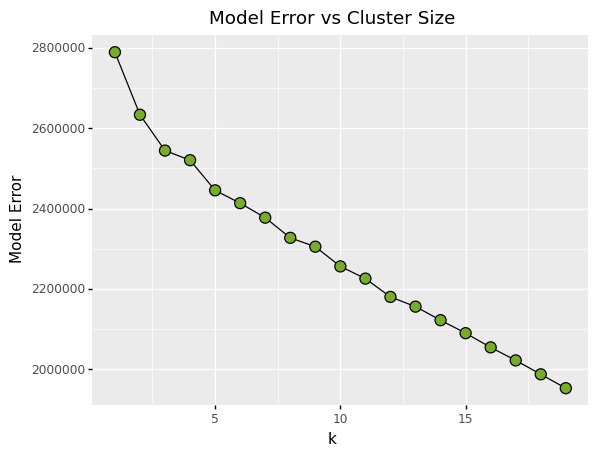

<ggplot: (-9223371914065086320)>

In [52]:
# plot error against cluster size to determine optimal number of clusters
# using the elbow method

data = pd.DataFrame({'error':errors,
                    'k':list(range(1,clusters_range))})
         
(
    ggplot(data, aes(x='k', y='error'))
    
    + geom_line()
    
    + geom_point(size=4, colour='black', fill='#77AC30')
    
    + xlab('k')
    
    + ylab('Model Error')
    
    + ggtitle('Model Error vs Cluster Size')
)

## Apply clustering algorithm

In [53]:
# k-means clustering algorithm
# default number of clusters (8) is used since elbow is not obvious

kmeans = KMeans(random_state=random_state)
kmeans.fit(sales_data_PCA.loc[:,0:cutoff])

KMeans(random_state=2023)

In [54]:
sales_df['Cluster'] = kmeans.labels_
sales_df

,Date,Year,Month,day_of_week,Customer Age,age_bracket,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue,Cluster
0,2016-02-19,2016.0,February,Friday,29.0,26-35,F,United States,Washington,Accessories,Tires and Tubes,1.0,80.00,109.000000,80.0,109.0,0
1,2016-02-20,2016.0,February,Saturday,29.0,26-35,F,United States,Washington,Clothing,Gloves,2.0,24.50,28.500000,49.0,57.0,3
2,2016-02-27,2016.0,February,Saturday,29.0,26-35,F,United States,Washington,Accessories,Tires and Tubes,3.0,3.67,5.000000,11.0,15.0,0
3,2016-03-12,2016.0,March,Saturday,29.0,26-35,F,United States,Washington,Accessories,Tires and Tubes,2.0,87.50,116.500000,175.0,233.0,0
4,2016-03-12,2016.0,March,Saturday,29.0,26-35,F,United States,Washington,Accessories,Tires and Tubes,3.0,35.00,41.666667,105.0,125.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34861,2015-03-22,2015.0,March,Sunday,38.0,36-50,M,France,Charente-Maritime,Bikes,Mountain Bikes,1.0,2049.00,1487.000000,2049.0,1487.0,2
34862,2016-02-07,2016.0,February,Sunday,38.0,36-50,M,France,Hauts de Seine,Bikes,Mountain Bikes,2.0,1160.00,985.500000,2320.0,1971.0,2
34863,2015-03-13,2015.0,March,Friday,38.0,36-50,M,France,Hauts de Seine,Bikes,Mountain Bikes,1.0,2049.00,1583.000000,2049.0,1583.0,2
34864,2015-04-05,2015.0,April,Sunday,38.0,36-50,M,France,Hauts de Seine,Bikes,Mountain Bikes,3.0,683.00,560.666667,2049.0,1682.0,2


In [55]:
sales_df['Cluster'] = sales_df['Cluster'].astype('category')
sales_df.dtypes

Date                datetime64[ns]
Year                      category
Month                     category
day_of_week               category
Customer Age               float64
age_bracket               category
Customer Gender           category
Country                   category
State                     category
Product Category          category
Sub Category              category
Quantity                   float64
Unit Cost                  float64
Unit Price                 float64
Cost                       float64
Revenue                    float64
Cluster                   category
dtype: object

## Analyze created clusters

In [56]:
# some summary statistics of the created clusters
sales_df.groupby('Cluster').agg({'Customer Age':'mean',
                                 'Revenue':'median',
                                 'Quantity':'median'})

,Customer Age,Revenue,Quantity
Cluster,,,
0,37.073797,153.0,2.0
1,36.401264,573.0,2.0
2,36.757632,2148.5,2.0
3,37.160417,467.5,2.0
4,35.315233,1217.0,2.0
5,35.962294,159.0,2.0
6,35.680255,340.0,2.0
7,35.032680,197.0,2.0


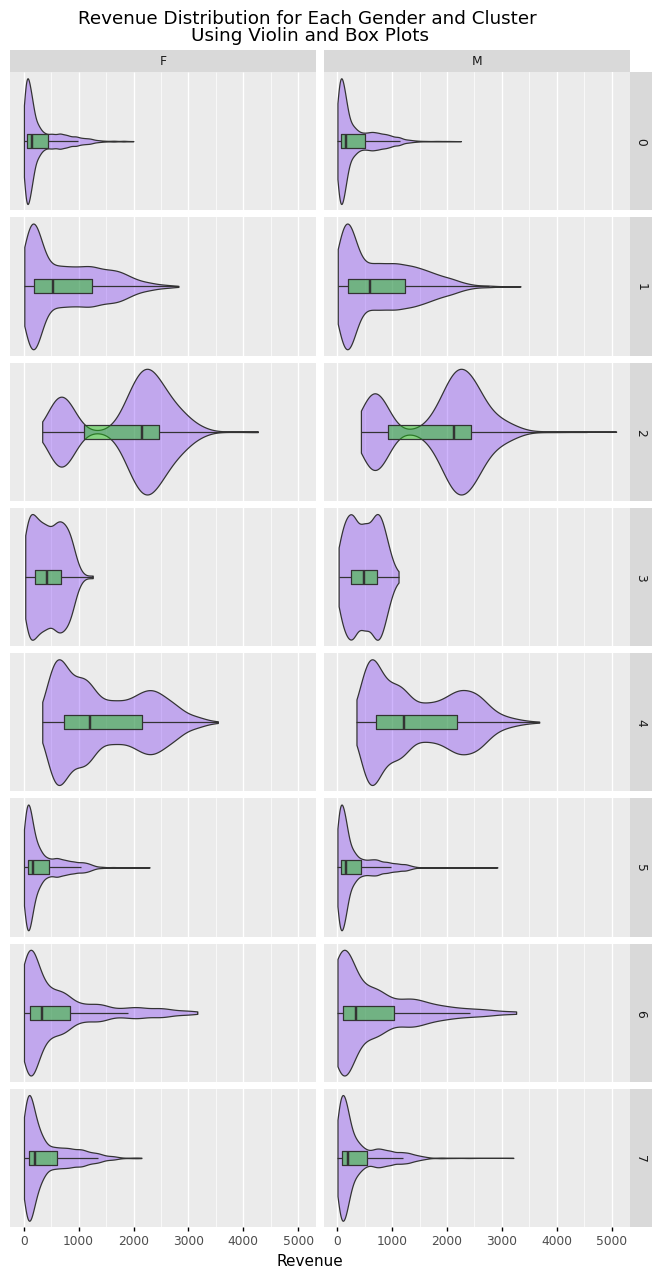

<ggplot: (122789233777)>

In [57]:
# Revenue Distribution for Each Gender and Cluster
(
    ggplot(sales_df, aes(x=1, y='Revenue'))
    
    + geom_violin(fill='#5e07f5',alpha=.3)
    
    + geom_boxplot(width=.1, fill='#23bd1a', alpha=.5, outlier_alpha=0)
    
    + coord_flip()
    
    + facet_grid('Cluster ~ Customer Gender')
    
    + ggtitle('Revenue Distribution for Each Gender and Cluster \nUsing Violin and Box Plots')
    
    + xlab('')
    
    + scale_x_continuous(breaks=None)  # remove x-axis tick marks
    
    + theme(figure_size=(8, 15), axis_title_x=None)  # remove x-axis label
)

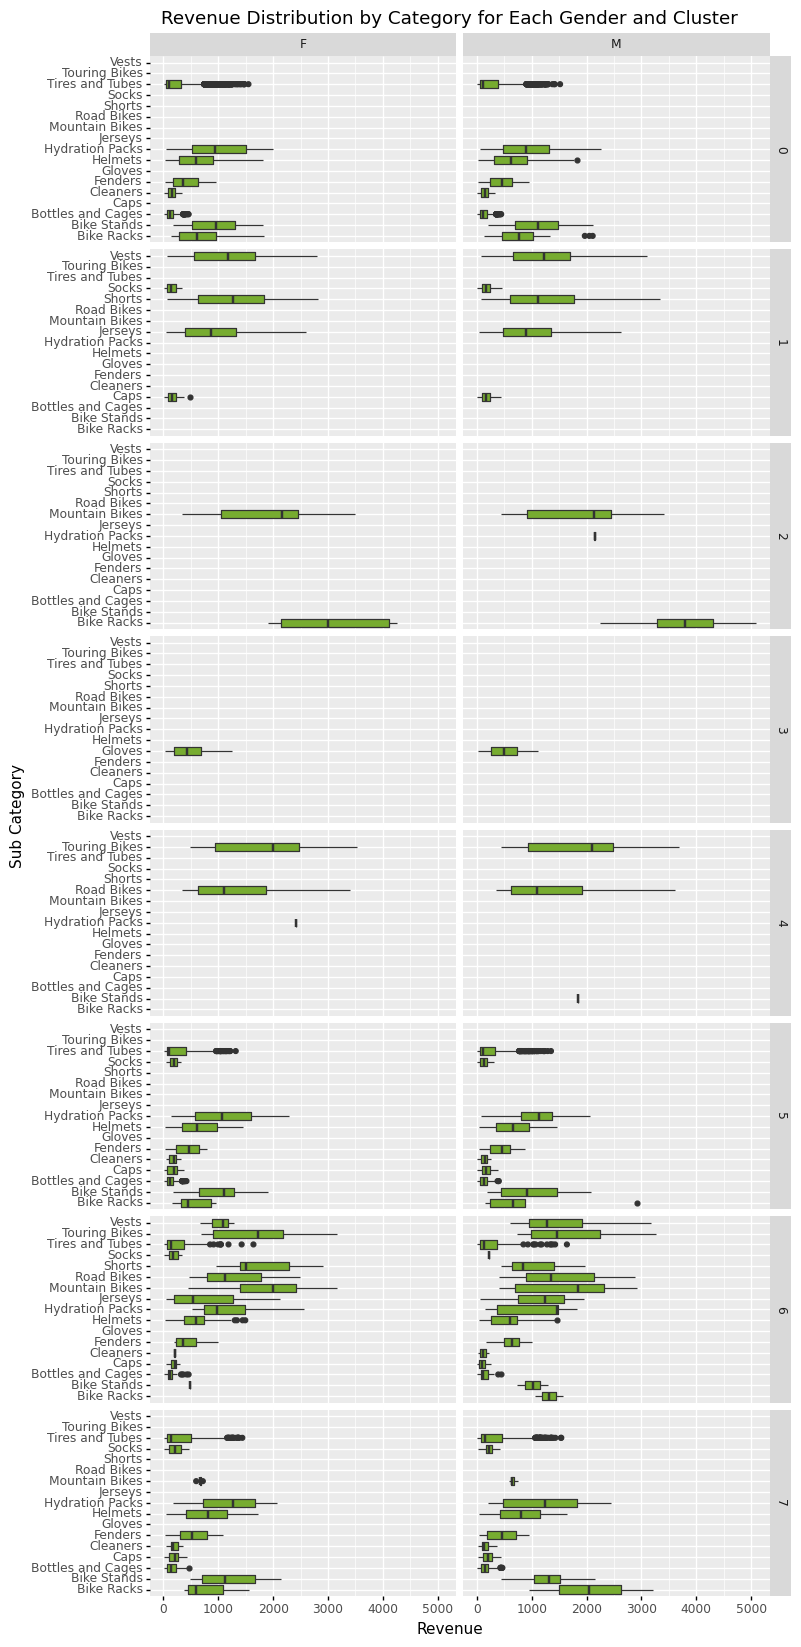

<ggplot: (-9223371914177137832)>

In [58]:
# Revenue Distribution by Category for Each Gender and Cluster
(
    ggplot(sales_df, aes(x='Sub Category', y='Revenue'))
    
    + geom_boxplot(fill='#77AC30')
    
    + coord_flip()
    
    + facet_grid('Cluster ~ Customer Gender')
    
    + ggtitle('Revenue Distribution by Category for Each Gender and Cluster')
    
    + theme(figure_size=(8, 20))
)

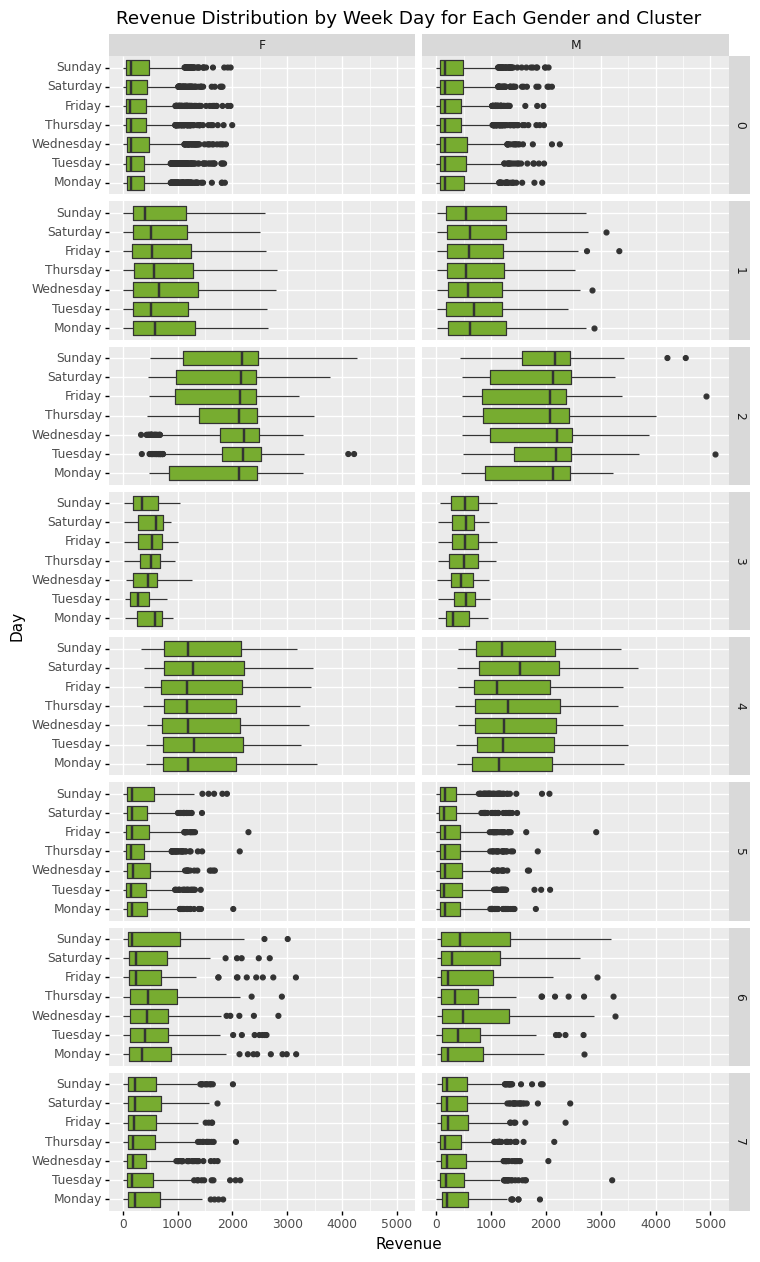

<ggplot: (-9223371914176113976)>

In [59]:
# Revenue Distribution by Week Day for Each Gender and Cluster
(
    ggplot(sales_df, aes(x='day_of_week', y='Revenue'))
    
    + geom_boxplot(fill='#77AC30')
    
    + scale_x_discrete(limits=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
    
    + coord_flip()
    
    + facet_grid('Cluster ~ Customer Gender')
    
    + ggtitle('Revenue Distribution by Week Day for Each Gender and Cluster')
    
    + xlab('Day')
    
    + theme(figure_size=(8, 15))
)

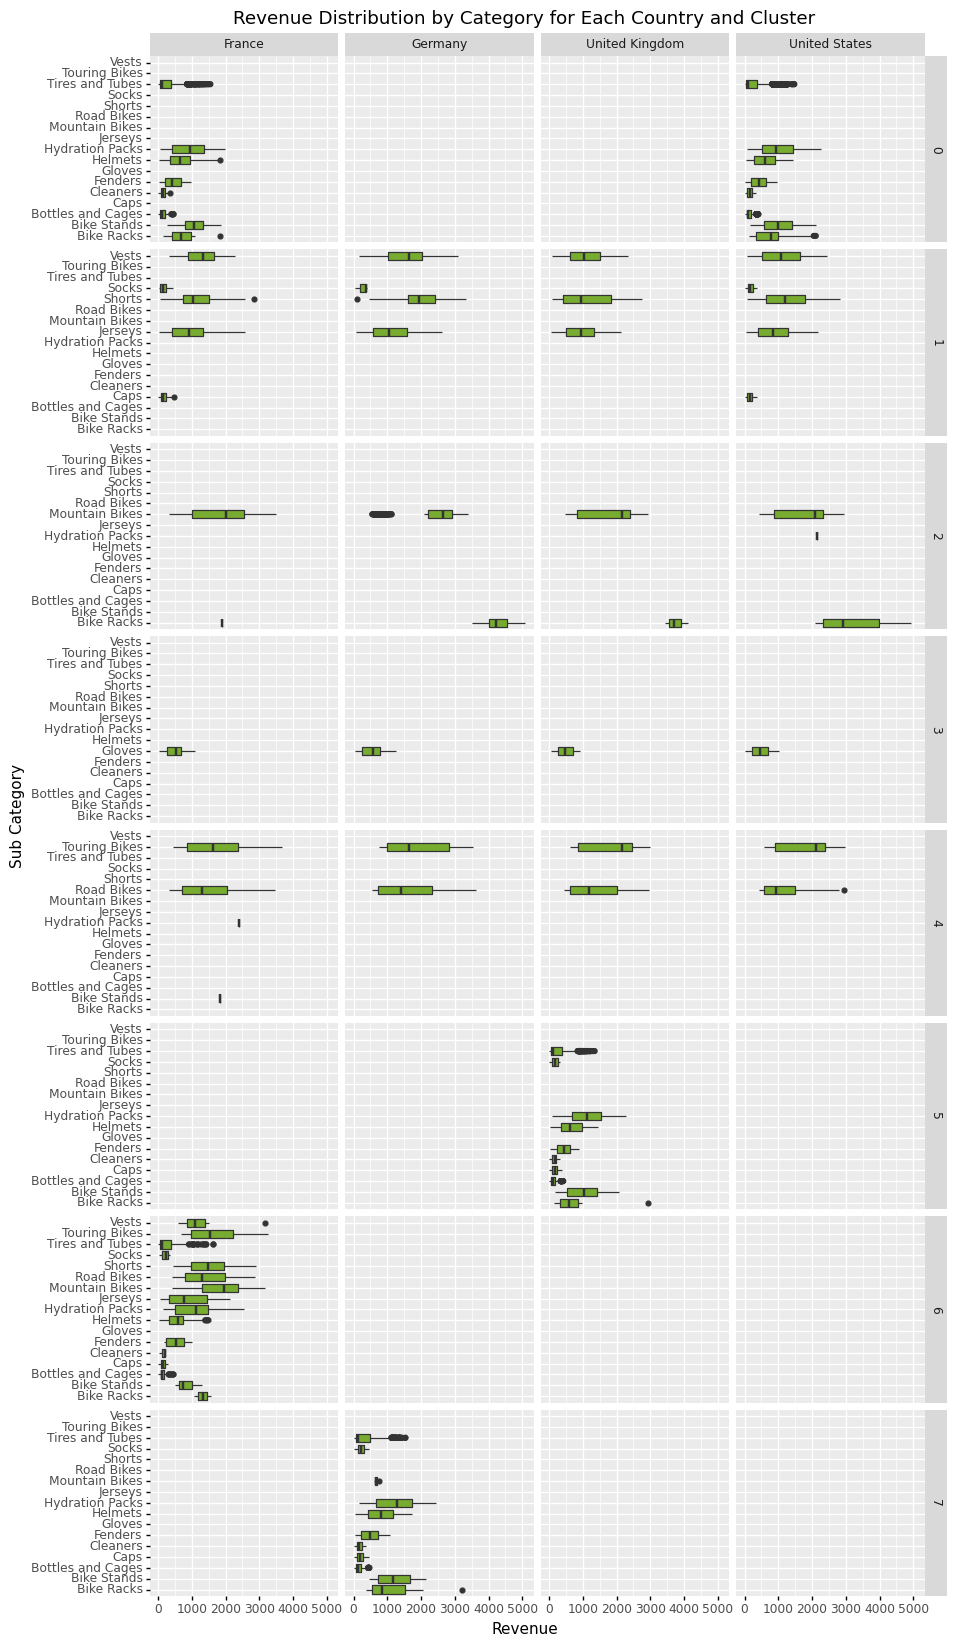

<ggplot: (122789528156)>

In [60]:
# Revenue Distribution by Category for Each Country and Cluster
(
    ggplot(sales_df, aes(x='Sub Category', y='Revenue'))
    
    + geom_boxplot(fill='#77AC30')
    
    + coord_flip()
    
    + facet_grid('Cluster ~ Country')
    
    + ggtitle('Revenue Distribution by Category for Each Country and Cluster')
    
    + theme(figure_size=(10, 20))
)

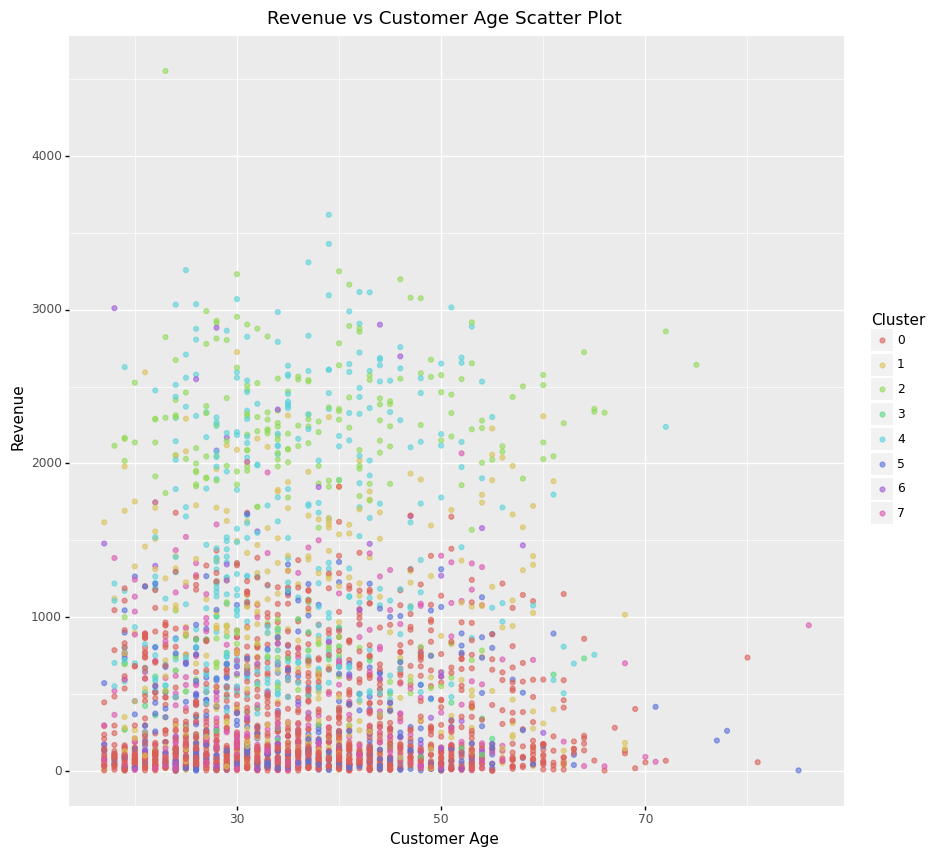

<ggplot: (122677663927)>

In [61]:
# Revenue vs Customer Age Scatter Plot

sample_size = 3000  # plot a random sample to reduce clutter
sample_data = sales_df.sample(n=sample_size)
(
    ggplot(sample_data, aes(x='Customer Age', y='Revenue'))
    
    + geom_point(aes(colour='Cluster'), alpha=0.6)
    
    + ggtitle('Revenue vs Customer Age Scatter Plot')
    
    + theme(figure_size=(10, 10))
)

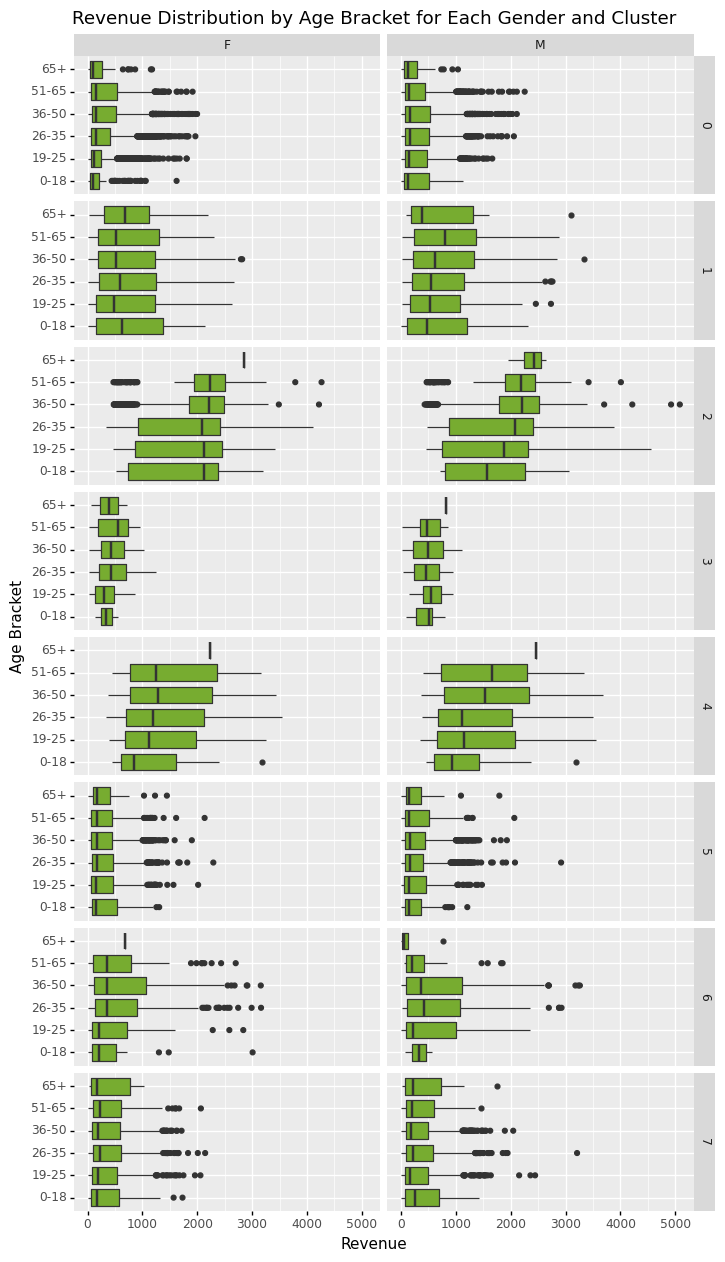

<ggplot: (-9223371914063162855)>

In [62]:
# Revenue Distribution by Age Bracket for Each Gender and Cluster
(
    ggplot(sales_df, aes(x='age_bracket', y='Revenue'))
    
    + geom_boxplot(fill='#77AC30')
    
    + coord_flip()
    
    + facet_grid('Cluster ~ Customer Gender')
    
    + xlab('Age Bracket')
    
    + ggtitle('Revenue Distribution by Age Bracket for Each Gender and Cluster')
    
    + theme(figure_size=(8, 15))
)